# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json
%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
monthly_income = 12000
my_btc = 1.2
my_eth =5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
# Fetch current BTC price
btc_price = requests.get(btc_url).json()
print(json.dumps(btc_price, indent =4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 19115343,
            "total_supply": 19115343,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 23263.0,
                    "volume_24h": 14337952777,
                    "market_cap": 444857523330,
                    "percentage_change_1h": -0.274705923044914,
                    "percentage_change_24h": 0.287663577175854,
                    "percentage_change_7d": -1.65120059616837,
                    "percent_change_1h": -0.274705923044914,
                    "percent_change_24h": 0.287663577175854,
                    "percent_change_7d": -1.65120059616837
                }
            },
            "last_updated": 1659913190
        }
    },
    "metadata": {
        "timestamp": 1659913190,
        "num_c

In [6]:
btc_price = btc_price['data']['1']['quotes']['USD']['price']
btc_price

23263.0

In [7]:
# Fetch current ETH price
eth_price = requests.get(eth_url).json()
print(json.dumps(eth_price, indent =4))

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 120005126,
            "total_supply": 120005126,
            "max_supply": 120005126,
            "quotes": {
                "USD": {
                    "price": 1705.1,
                    "volume_24h": 9540371832,
                    "market_cap": 204907120402,
                    "percentage_change_1h": -0.754857876531323,
                    "percentage_change_24h": -0.617685887171548,
                    "percentage_change_7d": 0.490167196887666,
                    "percent_change_1h": -0.754857876531323,
                    "percent_change_24h": -0.617685887171548,
                    "percent_change_7d": 0.490167196887666
                }
            },
            "last_updated": 1659913203
        }
    },
    "metadata": {
        "timestamp": 1659913203,
   

In [8]:
eth_price = eth_price['data']['1027']['quotes']['USD']['price']
eth_price

1705.1

In [9]:
# Compute current value of my btc
my_btc_value = my_btc*btc_price
my_btc_value

27915.6

In [10]:
# Compute current value of my eth
my_eth_value = my_eth*eth_price
my_eth_value

9037.029999999999

In [11]:
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $27915.60
The current value of your 5.3 ETH is $9037.03


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [12]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [13]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [14]:
# Format current date as ISO format
start_date = pd.Timestamp("2022-07-05", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-07-05", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_ticker = api.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df
df_ticker.head()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-07-05 04:00:00+00:00,102.54,102.7043,102.3465,102.53,6812884,27462,102.550765,AGG
2022-07-05 04:00:00+00:00,376.00,381.9800,372.9000,381.96,79886359,645355,377.447571,SPY


In [15]:
# Reorganize the DataFrame
# Separate ticker data
AGG = df_ticker[df_ticker['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_ticker[df_ticker['symbol']=='SPY'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
df_ticker = pd.concat([AGG,SPY], axis=1, keys=["AGG", "SPY"])
# Preview DataFrame
df_ticker.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2022-07-05 04:00:00+00:00  102.54  102.7043  102.3465  102.53  6812884   

                                                     SPY                 \
                          trade_count        vwap   open    high    low   
timestamp                                                                 
2022-07-05 04:00:00+00:00       27462  102.550765  376.0  381.98  372.9   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2022-07-05 04:00:00+00:00  381.96  79886359      645355  377.447571

In [16]:
# Pick AGG and SPY close prices
agg_close_price = float(df_ticker["AGG", "close"])
spy_close_price = float(df_ticker["SPY", "close"])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $102.53
Current SPY closing price: $381.96


In [17]:
# Compute the current value of shares
my_spy_value = my_spy*spy_close_price
my_agg_value = my_agg*agg_close_price
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19098.00
The current value of your 200 AGG shares is $20506.00


### Savings Health Analysis

In [73]:
# Set monthly household income
monthly_income = 12000
# Consolidate financial assets data
total_crypto_value = my_btc_value+my_eth_value
total_stock_value = my_spy_value+my_agg_value
total_crypto_value_fmt = f"${total_crypto_value:0.2f}"
total_stock_value_fmt = f"${total_stock_value:0.2f}"
print(total_crypto_value_fmt,",",total_stock_value_fmt)

$36952.63 , $39604.00


In [74]:
savings_data = [35953.72, 39604.00]
# Create savings DataFrame
savings_df = pd.DataFrame(savings_data, columns=["Amount"], index=["Crypto","Stock/Bond"])
# Display savings DataFrame
display(savings_df)

,Amount
Crypto,35953.72
Stock/Bond,39604.00


<AxesSubplot:title={'center':'Total Savings Chart'}, ylabel='Amount'>

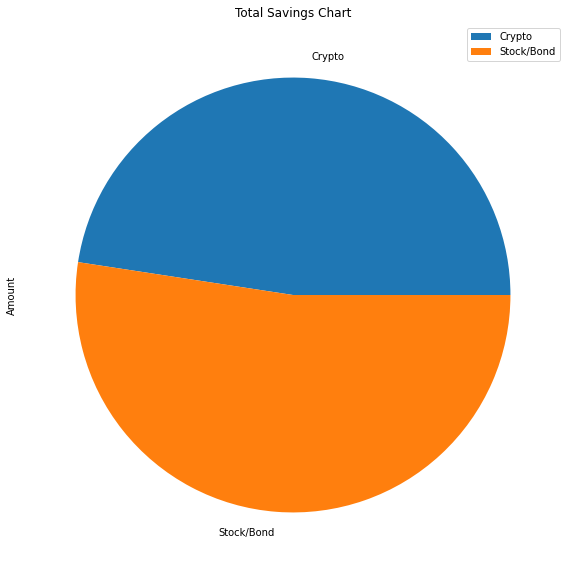

In [40]:
# Plot savings pie chart
savings_df.plot(kind='pie', y='Amount', title='Total Savings Chart', figsize=(20,10))

In [42]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
print(emergency_fund)

36000


In [77]:
# creat a value (x) to determine the number of dollars a the member is from reaching their goal should emergency_fund < monthly_imonthly_income
# Calculate total amount of savings
x = emergency_fund - total_crypto_value + total_stock_value

if emergency_fund > monthly_income:
  print("Congrats! You have a healthy savings account, therefore you have enough money for an emergency fund!")
elif emergency_fund == monthly_income:
  print("Congrats! You have saved one month's worth of your income. This is a very important financial goal to have reached. Well done!")
elif emergency_fund < monthly_income:
  print("You are", f"${x:0.2f}" ,"away from your goal")


Congrats! You have a healthy savings account, therefore you have enough money for an emergency fund! 


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [85]:
# Set start and end dates of three years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2019-07-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-07-01', tz='America/New_York').isoformat()

In [86]:
# Get 5 years' worth of historical data for SPY and AGG
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_stock_data = api.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df
df_stock_data.head()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2019-07-01 04:00:00+00:00,111.25,111.2700,111.010,111.18,4211486,17456,111.152261,AGG
2019-07-02 04:00:00+00:00,111.20,111.4062,111.140,111.38,5765493,14622,111.294019,AGG
2019-07-03 04:00:00+00:00,111.44,111.6000,111.430,111.56,1324832,6547,111.546814,AGG
2019-07-05 04:00:00+00:00,111.21,111.2100,110.905,111.09,2461249,10168,111.056293,AGG
2019-07-08 04:00:00+00:00,111.23,111.2600,111.030,111.03,3041397,14684,111.126862,AGG


In [87]:
# Reorganize the DataFrame
# Separate ticker data
AGG = df_stock_data[df_stock_data['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_stock_data[df_stock_data['symbol']=='SPY'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG,SPY], axis=1, keys=["AGG", "SPY"])
# Preview DataFrame
df_stock_data.head()

AGG                                      \
                             open      high      low   close   volume   
timestamp                                                               
2019-07-01 04:00:00+00:00  111.25  111.2700  111.010  111.18  4211486   
2019-07-02 04:00:00+00:00  111.20  111.4062  111.140  111.38  5765493   
2019-07-03 04:00:00+00:00  111.44  111.6000  111.430  111.56  1324832   
2019-07-05 04:00:00+00:00  111.21  111.2100  110.905  111.09  2461249   
2019-07-08 04:00:00+00:00  111.23  111.2600  111.030  111.03  3041397   

                                                      SPY                    \
                          trade_count        vwap    open      high     low   
timestamp                                                                     
2019-07-01 04:00:00+00:00       17456  111.152261  296.68  296.9200  294.33   
2019-07-02 04:00:00+00:00       14622  111.294019  295.59  296.4900  291.21   
2019-07-03 04:00:00+00:00        6547  111.546814  297.19  298.8200  297.02   
2019-07-05 04:00:00+00:00       10168  111.056293  297.46  298.6400  296.01   
2019-07-08 04:00:00+00:00       14684  111.126862  297.01  298.2579  296.22   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2019-07-01 04:00:00+00:00  295.66  79264778      313785  295.550961  
2019-07-02 04:00:00+00:00  296.43  62924305      243679  295.690540  
2019-07-03 04:00:00+00:00  298.80  40929346      162068  298.172623  
2019-07-05 04:00:00+00:00  298.46  51977326      229688  297.602081  
2019-07-08 04:00:00+00:00  296.82  45961732      190736  296.885773

In [95]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
 # Configure a Monte Carlo simulation to forecast five years cumulative returns
MC_60_40 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4, .6],
    num_simulation = 500,
    num_trading_days = 252*30
)

# Print the simulation input data
MC_60_40.portfolio_data.head()

AGG                                      \
                             open      high      low   close   volume   
timestamp                                                               
2019-07-01 04:00:00+00:00  111.25  111.2700  111.010  111.18  4211486   
2019-07-02 04:00:00+00:00  111.20  111.4062  111.140  111.38  5765493   
2019-07-03 04:00:00+00:00  111.44  111.6000  111.430  111.56  1324832   
2019-07-05 04:00:00+00:00  111.21  111.2100  110.905  111.09  2461249   
2019-07-08 04:00:00+00:00  111.23  111.2600  111.030  111.03  3041397   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-07-01 04:00:00+00:00       17456  111.152261          NaN  296.68   
2019-07-02 04:00:00+00:00       14622  111.294019     0.001799  295.59   
2019-07-03 04:00:00+00:00        6547  111.546814     0.001616  297.19   
2019-07-05 04:00:00+00:00       10168  111.056293    -0.004213  297.46   
2019-07-08 04:00:00+00:00       14684  111.126862    -0.000540  297.01   

                                                                           \
                               high     low   close    volume trade_count   
timestamp                                                                   
2019-07-01 04:00:00+00:00  296.9200  294.33  295.66  79264778      313785   
2019-07-02 04:00:00+00:00  296.4900  291.21  296.43  62924305      243679   
2019-07-03 04:00:00+00:00  298.8200  297.02  298.80  40929346      162068   
2019-07-05 04:00:00+00:00  298.6400  296.01  298.46  51977326      229688   
2019-07-08 04:00:00+00:00  298.2579  296.22  296.82  45961732      190736   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-07-01 04:00:00+00:00  295.550961          NaN  
2019-07-02 04:00:00+00:00  295.690540     0.002604  
2019-07-03 04:00:00+00:00  298.172623     0.007995  
2019-07-05 04:00:00+00:00  297.602081    -0.001138  
2019-07-08 04:00:00+00:00  296.885773    -0.005495

In [96]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_60_40.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/shayleaschreurs/Desktop/mod_5/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.017625,1.010865,0.994922,1.007929,1.005700,0.993705,1.019692,1.011586,0.998132,1.007082,...,1.002012,0.996370,1.005262,1.005092,0.994888,0.996662,0.998648,0.986760,1.012347,0.990657
2,1.010712,1.005994,1.017633,0.994899,1.019018,1.007978,1.010579,1.021236,0.994223,1.005239,...,1.002423,0.985239,0.998254,1.001382,0.984261,0.994366,1.002041,1.002731,1.005964,0.993793
3,1.003143,1.018533,1.024115,0.997345,1.030358,1.003159,1.003315,1.032829,0.992960,1.000148,...,0.988833,0.975148,0.985035,1.004771,0.971573,0.994273,1.011499,1.003891,1.001986,0.977836
4,0.998097,1.026009,1.038579,1.005734,1.026721,1.008228,1.003141,1.024612,0.988022,1.004758,...,0.988344,0.965744,0.992217,1.023883,0.975384,0.979429,1.015383,1.002964,1.009384,0.990525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,7.047160,5.732567,6.732495,7.104901,6.750275,5.542911,1.800494,3.049725,6.426425,3.479199,...,4.428554,10.726761,31.699043,5.073832,1.062994,6.850117,4.256469,4.314161,7.634117,7.009228
7557,7.050044,5.701132,6.829206,7.123715,6.666958,5.523248,1.816295,3.019939,6.487499,3.491521,...,4.433802,10.779962,32.004452,5.065368,1.063143,6.906952,4.258253,4.284307,7.594051,7.145748
7558,7.152559,5.708073,6.813553,7.131540,6.632104,5.551565,1.821335,3.035994,6.483062,3.525975,...,4.447242,10.887708,31.986029,5.128659,1.051893,6.756782,4.219848,4.250172,7.588820,7.096809
7559,7.195586,5.816834,6.835879,7.160430,6.592760,5.487742,1.803603,3.034891,6.430286,3.525513,...,4.466758,10.968786,31.782271,5.141062,1.050265,6.721128,4.225792,4.259953,7.551132,7.121288


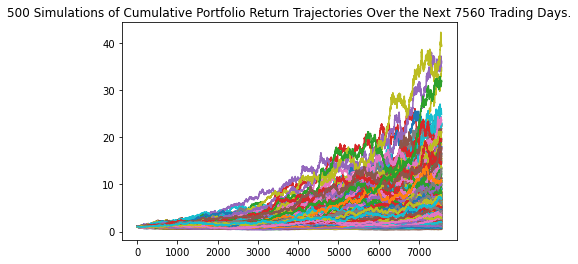

In [97]:
# Plot simulation outcomes
line_plot = MC_60_40.plot_simulation()

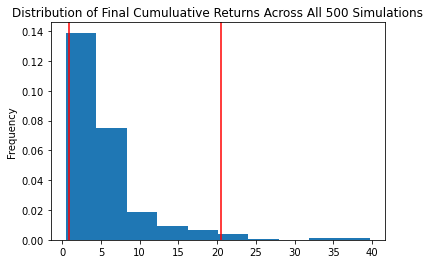

In [98]:
# Plot probability distribution and confidence intervals
dist_plot = MC_60_40.plot_distribution()

### Retirement Analysis

In [99]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_60_40.summarize_cumulative_return()
# Print summary statistics
print(even_tbl)

count           500.000000
mean              5.559495
std               5.177852
min               0.456155
25%               2.352585
50%               4.061943
75%               6.849396
max              39.760958
95% CI Lower      0.816663
95% CI Upper     20.474517
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")